# Neural Network Architecture Experiments with Wine Dataset

In this assignment, you will experiment with different neural network architectures using the Wine dataset from sklearn.

## Task 1: Data Preparation (10 points)

In [ ]:
# Import required libraries
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# Load the wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# TODO: Split the data into training (80%) and testing (20%) sets
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

# TODO: Scale the features using StandardScaler
# YOUR CODE HERE
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# TODO: Convert labels to one-hot encoding
# YOUR CODE HERE
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print("Training set shape:", X_train_scaled.shape)
print("Test set shape:", X_test_scaled.shape)

Training set shape: (142, 13)
Test set shape: (36, 13)
Training set shape: (142, 13)
Test set shape: (36, 13)


## Task 2: Neural Network Architecture Experiments (60 points)

In [ ]:
def create_model_a():
    """Create Model A: Single Hidden Layer"""
    model = Sequential([
        Dense(4, activation='relu', input_shape=(13,)),
        Dense(3, activation='softmax')
    ])
    return model

def create_model_b():
    """Create Model B: Two Hidden Layers"""
    model = Sequential([
        Dense(8, activation='relu', input_shape=(13,)),
        Dense(4, activation='relu'),
        Dense(3, activation='softmax')
    ])
    return model

def create_model_c():
    """Create Model C: Wide Single Layer"""
    model = Sequential([
        Dense(16, activation='relu', input_shape=(13,)),
        Dense(3, activation='softmax')
    ])
    return model

def train_and_evaluate(model, lr, X_train, y_train, X_test, y_test):
    """Train and evaluate a model with given learning rate"""
    model.compile(optimizer=tf.keras.optimizers.Adam(lr),
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])

    history = model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=32,
                       validation_split=0.2,
                       verbose=1)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return history, test_loss, test_acc

### Experiment with Model A

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 537ms/step - accuracy: 0.3255 - loss: 1.4030 - val_accuracy: 0.6897 - val_loss: 0.7578
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.7453 - loss: 0.6711 - val_accuracy: 0.9310 - val_loss: 0.3920
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.9583 - loss: 0.3280 - val_accuracy: 0.9655 - val_loss: 0.3511
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.9496 - loss: 0.2261 - val_accuracy: 0.9655 - val_loss: 0.2430
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.9706 - loss: 0.1399 - val_accuracy: 0.9655 - val_loss: 0.1137
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9856 - loss: 0.0982 - val_accuracy: 1.0000 - val_loss: 0.0517
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.9856 - loss: 0.0692 - val_accuracy: 1.0000 - val_loss: 0.0300
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9944 - loss: 0.0480 - val_accuracy: 1.0000 - val_loss: 0.020

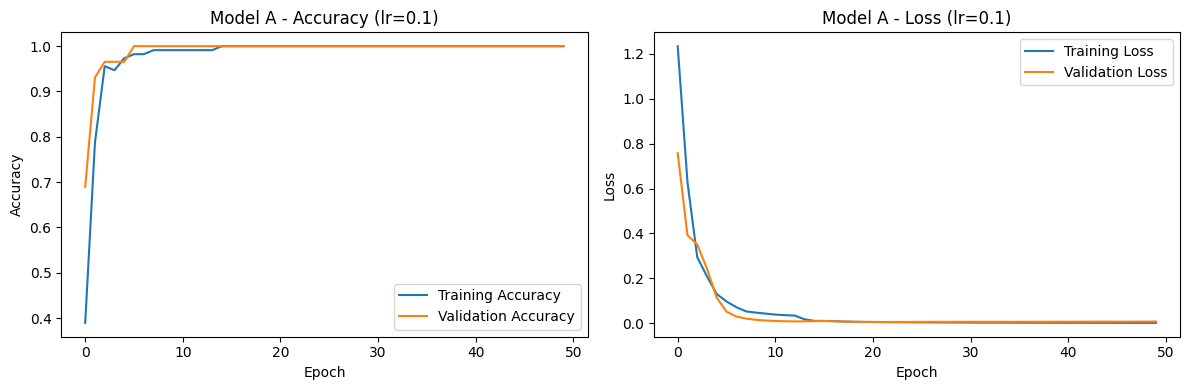

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4603 - loss: 0.9463 - val_accuracy: 0.5862 - val_loss: 0.8177
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6994 - loss: 0.7633 - val_accuracy: 0.7586 - val_loss: 0.6662
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8338 - loss: 0.6521 - val_accuracy: 0.8276 - val_loss: 0.5706
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7923 - loss: 0.5855 - val_accuracy: 0.8276 - val_loss: 0.4988
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8365 - loss: 0.5351 - val_accuracy: 0.8966 - val_loss: 0.4445
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8515 - loss: 0.4884 - val_accuracy: 0.9310 - val_loss: 0.3993
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8602 - loss: 0.4446 - val_accuracy: 1.0000 - val_loss: 0.3616
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8990 - loss: 0.4048 - val_accuracy: 1.0000 - val_loss: 0.3300


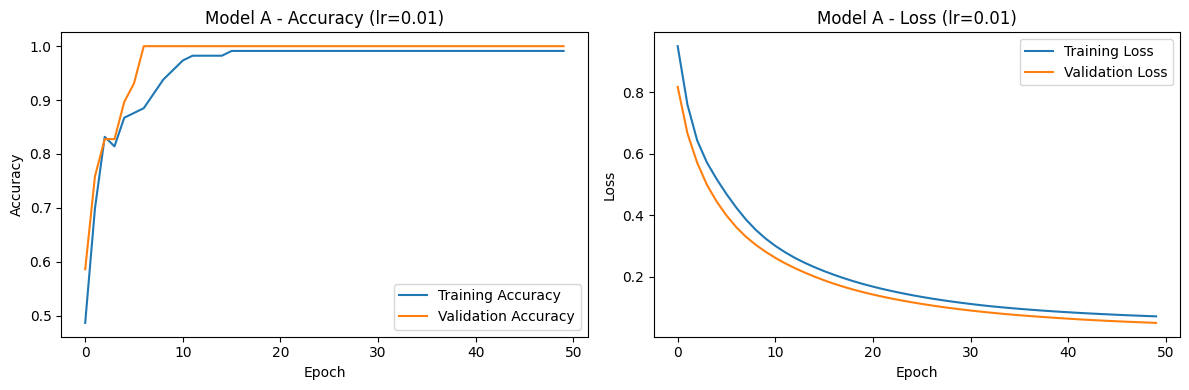

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.2954 - loss: 1.1905 - val_accuracy: 0.4828 - val_loss: 1.0174
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2954 - loss: 1.1698 - val_accuracy: 0.5172 - val_loss: 1.0046
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3535 - loss: 1.1505 - val_accuracy: 0.5172 - val_loss: 0.9917
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3535 - loss: 1.1315 - val_accuracy: 0.5172 - val_loss: 0.9789
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3693 - loss: 1.1131 - val_accuracy: 0.6207 - val_loss: 0.9665
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4237 - loss: 1.0951 - val_accuracy: 0.6207 - val_loss: 0.9543
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4355 - loss: 1.0772 - val_accuracy: 0.6207 - val_loss: 0.9424
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4541 - loss: 1.0597 - val_accuracy: 0.6207 - val_loss: 0.9311

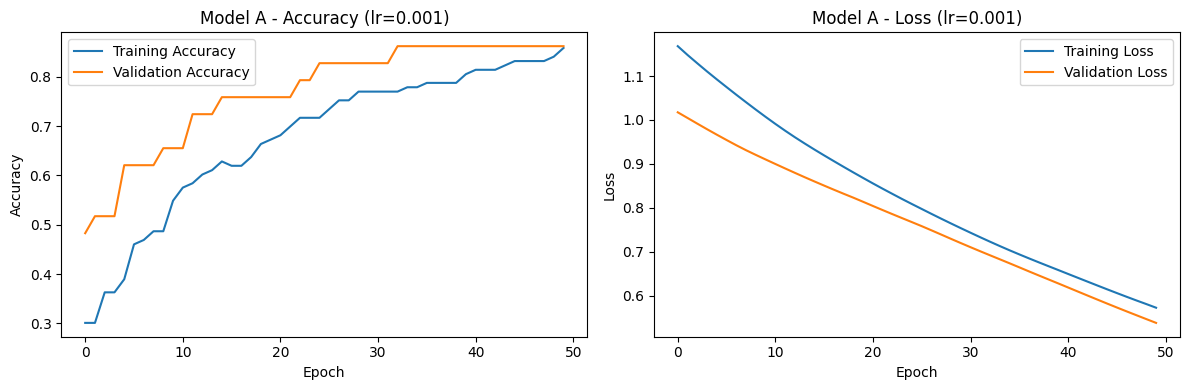

In [ ]:
# TODO: Train Model A with different learning rates
learning_rates = [0.1, 0.01, 0.001]
results_a = []

for lr in learning_rates:
    model_a = create_model_a()
    history, loss, acc = train_and_evaluate(model_a, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_a.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model A - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model A - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Experiment with Model B

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.4826 - loss: 0.9528 - val_accuracy: 0.8621 - val_loss: 0.4967
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9290 - loss: 0.2104 - val_accuracy: 0.9655 - val_loss: 0.1010
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9706 - loss: 0.1064 - val_accuracy: 0.9655 - val_loss: 0.1830
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9877 - loss: 0.0137 - val_accuracy: 0.9655 - val_loss: 0.2809
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9700 - loss: 0.0786 - val_accuracy: 1.0000 - val_loss: 0.0124
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9856 - loss: 0.0602 - val_accuracy: 1.0000 - val_loss: 0.0088
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0132 - val_accuracy: 1.0000 - val_loss: 0.0018
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 6.0708e-04 - val_accuracy: 1.0000 - val_loss: 2.4

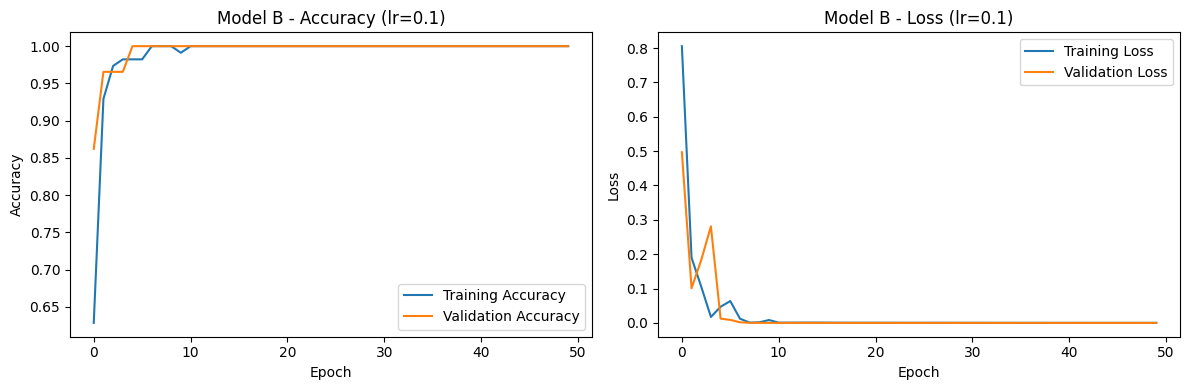

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.3614 - loss: 1.5336 - val_accuracy: 0.4483 - val_loss: 1.2505
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4324 - loss: 1.0753 - val_accuracy: 0.4483 - val_loss: 1.0068
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5874 - loss: 0.9096 - val_accuracy: 0.6207 - val_loss: 0.9114
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6469 - loss: 0.8415 - val_accuracy: 0.7931 - val_loss: 0.8399
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7261 - loss: 0.7800 - val_accuracy: 0.8621 - val_loss: 0.7738
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8409 - loss: 0.7139 - val_accuracy: 0.8621 - val_loss: 0.7064
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8894 - loss: 0.6390 - val_accuracy: 0.8621 - val_loss: 0.6362
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9054 - loss: 0.5602 - val_accuracy: 0.9310 - val_loss: 0.5677


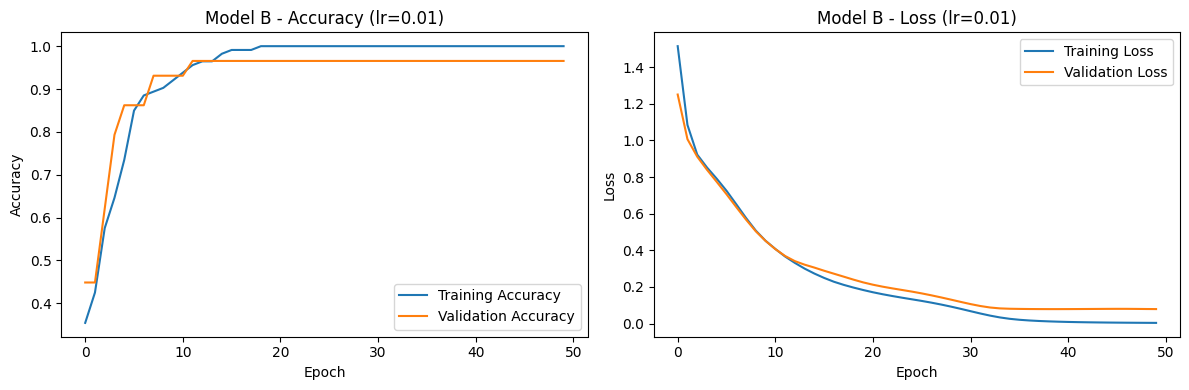

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.2781 - loss: 1.1904 - val_accuracy: 0.2759 - val_loss: 1.1553
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2781 - loss: 1.1693 - val_accuracy: 0.2759 - val_loss: 1.1431
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2781 - loss: 1.1513 - val_accuracy: 0.2759 - val_loss: 1.1317
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2931 - loss: 1.1347 - val_accuracy: 0.2759 - val_loss: 1.1206
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2931 - loss: 1.1189 - val_accuracy: 0.2759 - val_loss: 1.1104
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2931 - loss: 1.1043 - val_accuracy: 0.2759 - val_loss: 1.1005
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2931 - loss: 1.0921 - val_accuracy: 0.2759 - val_loss: 1.0904
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2931 - loss: 1.0812 - val_accuracy: 0.2759 - val_loss: 1.0806


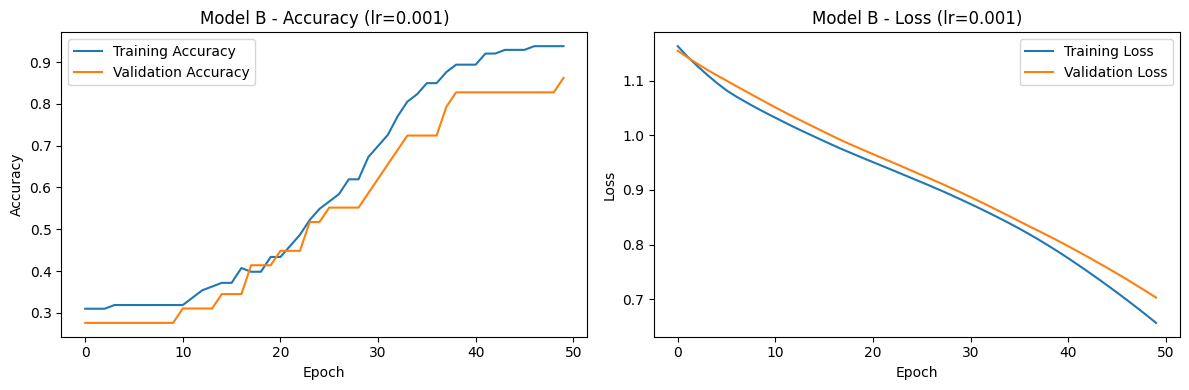

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - accuracy: 0.2433 - loss: 1.4153 - val_accuracy: 0.4483 - val_loss: 1.3529
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2754 - loss: 1.4114 - val_accuracy: 0.4138 - val_loss: 1.3497
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2960 - loss: 1.4076 - val_accuracy: 0.4138 - val_loss: 1.3465
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2960 - loss: 1.4038 - val_accuracy: 0.4138 - val_loss: 1.3434
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2960 - loss: 1.4001 - val_accuracy: 0.4138 - val_loss: 1.3402
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.2960 - loss: 1.3964 - val_accuracy: 0.4138 - val_loss: 1.3371
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2960 - loss: 1.3928 - val_accuracy: 0.4138 - val_loss: 1.3340
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2960 - loss: 1.3893 - val_accuracy: 0.4138 - val_loss: 1.3309


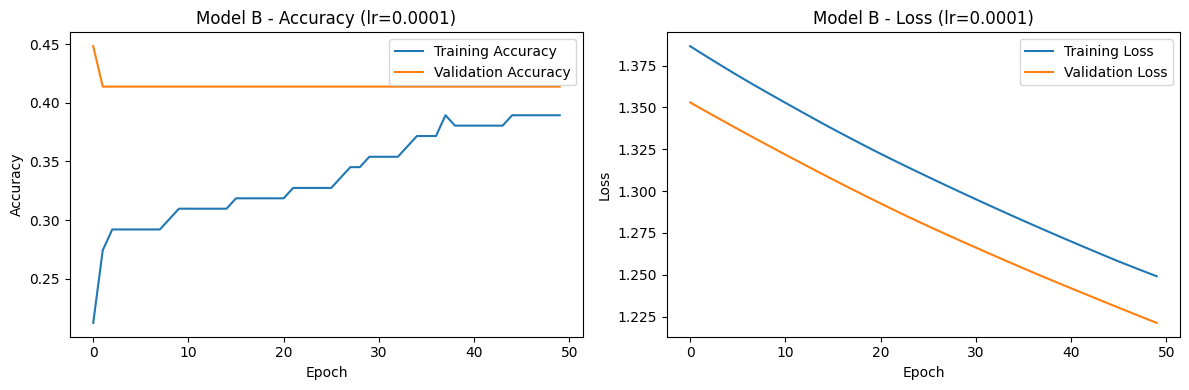

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 87ms/step - accuracy: 0.4372 - loss: 1.0816 - val_accuracy: 0.4138 - val_loss: 1.0229
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3922 - loss: 1.0814 - val_accuracy: 0.4138 - val_loss: 1.0228
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4182 - loss: 1.0813 - val_accuracy: 0.4828 - val_loss: 1.0227
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4720 - loss: 1.0812 - val_accuracy: 0.4828 - val_loss: 1.0226
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4720 - loss: 1.0811 - val_accuracy: 0.4828 - val_loss: 1.0225
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4720 - loss: 1.0810 - val_accuracy: 0.4828 - val_loss: 1.0224
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.4720 - loss: 1.0808 - val_accuracy: 0.4828 - val_loss: 1.0223
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4720 - loss: 1.0807 - val_accuracy: 0.4828 - val_loss: 1.0222


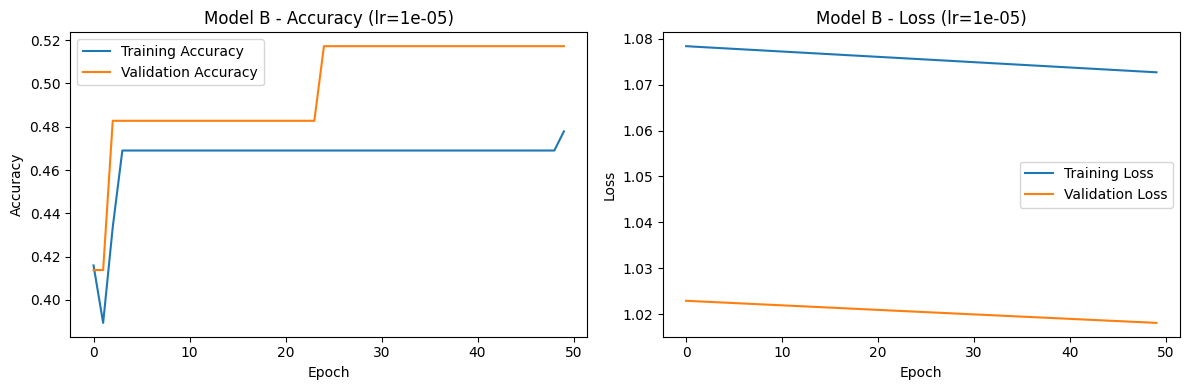

In [ ]:
# TODO: Train Model B with different learning rates
# YOUR CODE HERE (similar to Model A)
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
results_b = []

for lr in learning_rates:
    model_b = create_model_b()
    history, loss, acc = train_and_evaluate(model_b, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_b.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model B - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model B - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

### Experiment with Model C

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5617 - loss: 0.9629 - val_accuracy: 0.9655 - val_loss: 0.1945
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9469 - loss: 0.2290 - val_accuracy: 1.0000 - val_loss: 0.0203
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9615 - loss: 0.0658 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0202 - val_accuracy: 1.0000 - val_loss: 0.0165
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9850 - loss: 0.0287 - val_accuracy: 1.0000 - val_loss: 0.0178
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.9655 - val_loss: 0.0309
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0064 - val_accuracy: 0.9655 - val_loss: 0.0427
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.9655 - val_loss: 0.0459


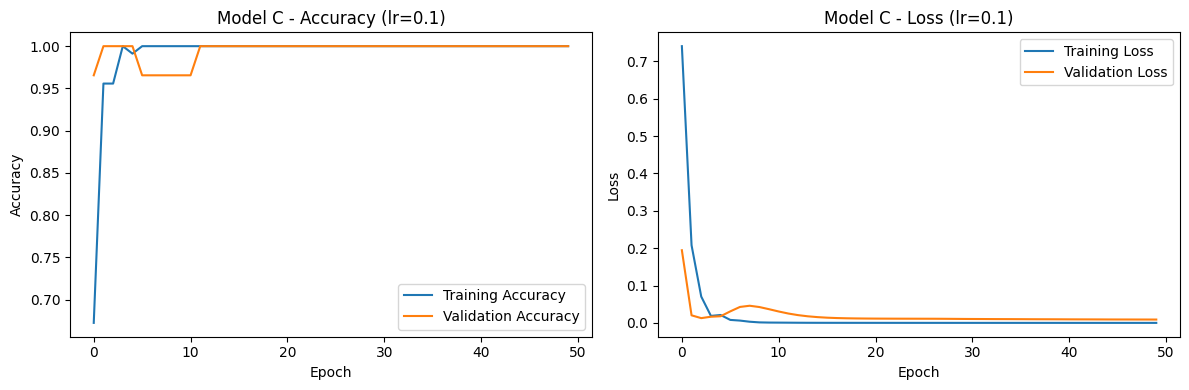

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - accuracy: 0.5449 - loss: 1.0022 - val_accuracy: 0.7586 - val_loss: 0.8134
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8196 - loss: 0.6311 - val_accuracy: 0.8276 - val_loss: 0.5522
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9094 - loss: 0.3970 - val_accuracy: 0.8966 - val_loss: 0.3940
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9563 - loss: 0.2546 - val_accuracy: 0.9310 - val_loss: 0.3012
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9563 - loss: 0.1738 - val_accuracy: 0.9310 - val_loss: 0.2436
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.9619 - loss: 0.1265 - val_accuracy: 0.9310 - val_loss: 0.2040
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9825 - loss: 0.0967 - val_accuracy: 0.9310 - val_loss: 0.1751
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9913 - loss: 0.0769 - val_accuracy: 0.9310 - val_loss: 0.1524

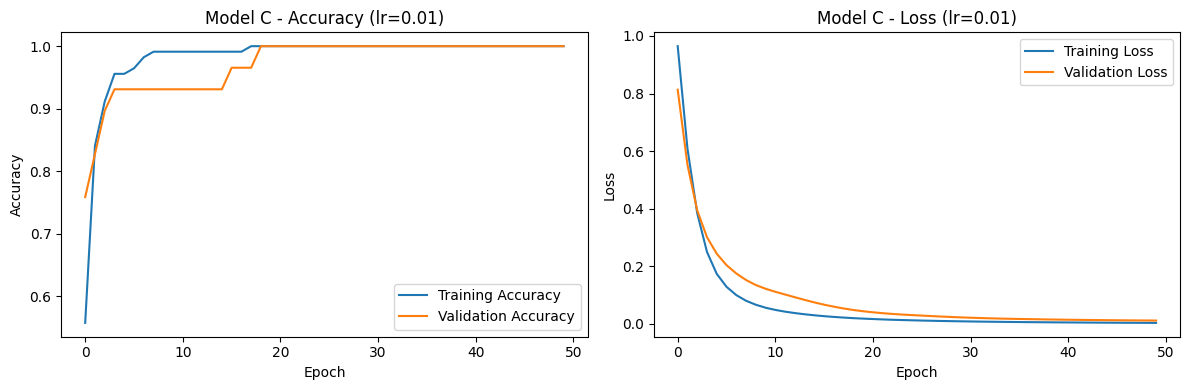

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.3095 - loss: 1.2936 - val_accuracy: 0.2759 - val_loss: 1.3551
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3689 - loss: 1.2435 - val_accuracy: 0.2759 - val_loss: 1.3079
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3833 - loss: 1.1968 - val_accuracy: 0.2759 - val_loss: 1.2631
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4007 - loss: 1.1523 - val_accuracy: 0.3103 - val_loss: 1.2203
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4249 - loss: 1.1099 - val_accuracy: 0.3103 - val_loss: 1.1789
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4805 - loss: 1.0695 - val_accuracy: 0.3103 - val_loss: 1.1398
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5041 - loss: 1.0306 - val_accuracy: 0.3103 - val_loss: 1.1025
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5597 - loss: 0.9936 - val_accuracy: 0.4138 - val_loss: 1.0671


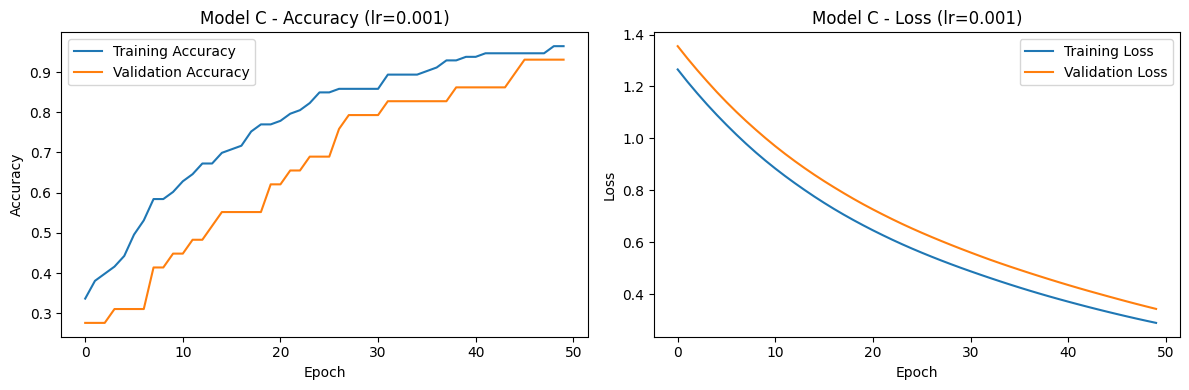

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - accuracy: 0.4185 - loss: 0.9383 - val_accuracy: 0.5517 - val_loss: 0.8457
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4272 - loss: 0.9328 - val_accuracy: 0.5517 - val_loss: 0.8405
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.4272 - loss: 0.9276 - val_accuracy: 0.5517 - val_loss: 0.8354
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4328 - loss: 0.9224 - val_accuracy: 0.5862 - val_loss: 0.8303
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4328 - loss: 0.9172 - val_accuracy: 0.5862 - val_loss: 0.8253
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4328 - loss: 0.9121 - val_accuracy: 0.5862 - val_loss: 0.8203
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4328 - loss: 0.9070 - val_accuracy: 0.5862 - val_loss: 0.8153
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4328 - loss: 0.9020 - val_accuracy: 0.5862 - val_loss: 0.8104


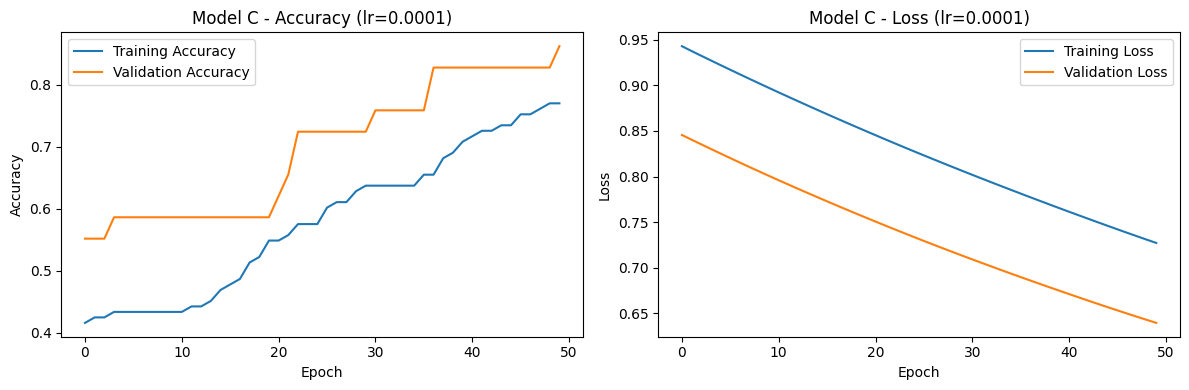

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.3772 - loss: 1.9147 - val_accuracy: 0.4138 - val_loss: 1.6876
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3772 - loss: 1.9139 - val_accuracy: 0.4138 - val_loss: 1.6868
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3772 - loss: 1.9132 - val_accuracy: 0.4138 - val_loss: 1.6861
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3772 - loss: 1.9124 - val_accuracy: 0.4138 - val_loss: 1.6853
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.3772 - loss: 1.9116 - val_accuracy: 0.4138 - val_loss: 1.6846
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.3772 - loss: 1.9109 - val_accuracy: 0.4138 - val_loss: 1.6839
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3772 - loss: 1.9101 - val_accuracy: 0.4138 - val_loss: 1.6831
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3772 - loss: 1.9093 - val_accuracy: 0.4138 - val_loss: 1.6824


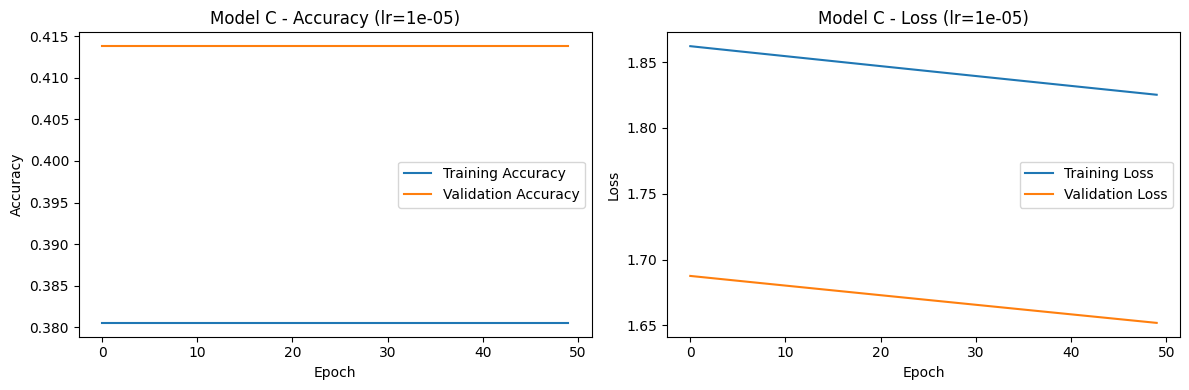

In [ ]:
# TODO: Train Model C with different learning rates
# YOUR CODE HERE (similar to Model A)
learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.00001]
results_c = []

for lr in learning_rates:
    model_c = create_model_c()
    history, loss, acc = train_and_evaluate(model_c, lr, X_train_scaled, y_train_cat, X_test_scaled, y_test_cat)
    results_c.append((lr, history, loss, acc))

    # Plot training history
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model C - Accuracy (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model C - Loss (lr={lr})')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

## Task 3: Hyperparameter Comparison Table (20 points)

In [ ]:
# Create a comparison table
# results = {
#     'Model': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
#     'Hidden Layers': [1, 1, 1, 2, 2, 2, 1, 1, 1],
#     'Neurons': ['[4]', '[4]', '[4]', '[8,4]', '[8,4]', '[8,4]', '[16]', '[16]', '[16]'],
#     'Learning Rate': [0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001],
#     'Test Accuracy': [# TODO: Fill in your results]
# }

# import pandas as pd
# results_df = pd.DataFrame(results)
# print(results_df.to_string(index=False))

# Collect test accuracy values from results
test_accuracies_a = [acc for (_, _, _, acc) in results_a]
test_accuracies_b = [acc for (_, _, _, acc) in results_b]
test_accuracies_c = [acc for (_, _, _, acc) in results_c]

# Combine all results into a single list
test_accuracies = test_accuracies_a + test_accuracies_b[:3] + test_accuracies_c[:3]

# Update the results dictionary
results = {
    'Model': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Hidden Layers': [1, 1, 1, 2, 2, 2, 1, 1, 1],
    'Neurons': ['[4]', '[4]', '[4]', '[8,4]', '[8,4]', '[8,4]', '[16]', '[16]', '[16]'],
    'Learning Rate': [0.1, 0.01, 0.001, 0.1, 0.01, 0.001, 0.1, 0.01, 0.001],
    'Test Accuracy': test_accuracies
}

# Create DataFrame
import pandas as pd
results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

Model  Hidden Layers Neurons  Learning Rate  Test Accuracy
    A              1     [4]          0.100       1.000000
    A              1     [4]          0.010       1.000000
    A              1     [4]          0.001       0.888889
    B              2   [8,4]          0.100       1.000000
    B              2   [8,4]          0.010       1.000000
    B              2   [8,4]          0.001       0.972222
    C              1    [16]          0.100       1.000000
    C              1    [16]          0.010       1.000000
    C              1    [16]          0.001       0.916667


In [ ]:
# Sort the results by Test Accuracy in descending order
sorted_results_df = results_df.sort_values(by='Test Accuracy', ascending=False)

# Print the sorted table
print(sorted_results_df.to_string(index=False))

Model  Hidden Layers Neurons  Learning Rate  Test Accuracy
    A              1     [4]          0.100       1.000000
    A              1     [4]          0.010       1.000000
    B              2   [8,4]          0.100       1.000000
    B              2   [8,4]          0.010       1.000000
    C              1    [16]          0.100       1.000000
    C              1    [16]          0.010       1.000000
    B              2   [8,4]          0.001       0.972222
    C              1    [16]          0.001       0.916667
    A              1     [4]          0.001       0.888889


## Task 4: Analysis Questions (10 points)

Answer the following questions based on your experiments:

1. Which architecture performed best? Why?

Model A with architectur of 1 hidder layer, [4] neurons with learning rate 0.100, 0.010, Model B with architecture of 2 hidder layer, [8,4] neurons with learning rate 0.100, 0.010 and Model C with 1 hidden layer [16] neurons with learning rate of 0.100, 0.010 perform best in test accuracy. It is because fo overfitting of the model meaning complete memorization of the data.

2. How did learning rate affect training?

With the same architecture higher the learning rate higher the test accuracy

3. What is the impact of adding more neurons?

Adding more neurons causes overfitting of the model.

4. Which activation function would you try next?

SiLU (Sigmoid Linear Unit)